**Implementación de Algoritmo RSA**

**Autores:** Juan Pablo Bustamante Moreno, David Alexander Zambrano Bohórquez.

Introducción

  1. Problema a resolver
  
  La pandemia de coronavirus que ha tenido lugar a lo largo del 2020 ha causado, gracias a los períodos de cuarentena, un aumento en el uso de diversas plataformas virtuales. En consecuencia, el número de delitos cibernéticos también ha crecido de modo alarmante: para el mes de agosto, nada más en Colombia, estos habían presentado un incremento del 150% y se habían encontrado alrededor de 200 páginas con contenido malicioso [1]. Se hace evidente, entonces, una preocupación generalizada respecto a la seguridad informática en los habitantes del mundo digital. Esto se agrava más al tener en cuenta que se estas eguridad depende el dinero y la información importante de muchas personas que confían en los lugarers que visitan y las acciones que realizan. Por tal motivo, la necesidad de profundizar en áreas relacionadas, con el fin de desarrollar estrategias para la protección de los usuarios, se convierte en una nueva necesidad para los ingenieros de sistemas en formación.

  2. Estado del arte

  Existen diferentes formas o algoritmos de encriptar un mensaje, cada uno de ellos se usa de manera diferente dependiendo de lo que se desea enviar de un lugar a otro. Entre los principales se destacan dos formas de realizarlo, el cifrado simétrico y el asimétrico. [2]

  Por parte del cifrado simétrico, los esquemas de cifrado simétrico (clave secreta) utilizan la misma clave para el cifrado y el descifrado y, por lo general, tienen longitudes de clave predefinidas. Proporcionan una alta seguridad y un alto rendimiento, pero sufren el problema del intercambio de claves. Un grupo de entidades necesita intercambiar $\frac{n(n − 1)}{2}$ claves diferentes a través de canales seguros.

  Por otro lado, en el sifrado asimétrico, los esquemas de cifrado asimétrico (clave pública) utilizan diferentes claves para el cifrado y el descifrado, y normalmente tienen longitudes de clave arbitrarias. Es importante que sea prácticamente imposible calcular la clave de descifrado a partir de la clave de cifrado. Esto reduce el número de pares de claves diferentes en un grupo de $n$ entidades a $n$. Los algoritmos de clave pública tienen matemáticas complejas y necesitan claves muy largas. Debido a esto, la criptografía de clave pública es mucho más lenta que la criptografía de clave secreta.

  Uno de los algoritmos que se considera bastante seguro dentro de este último grupo es el llamado RSA. Además, al tratarse de uno de los cifrados más populares en la actualidad, ya ha sido abordado mútiples veces en estudios que buscan determinar su eficiencia y su seguridad, siendo comparado con otros algoritmos como AES, IDEA Y RC4. Como conclusión de dichos estudios se obtuvo que el RSA contaba con las mejores características para catalogarse como un buen sistema de cifrado, si bien se recomienda a usar claves grandes y, por tanto, consume mayor tiempo. [3] 

  A continuación se realizará una implementación de este algoritmo, aplicando nociones de teoría de números.

Materiales y Métodos.

1. Datos utilizados.

  Los datos que se utilzan para este proyecto consisten de cadenas de texto que serán cifradas empleando un algoritmo RSA y dos números primos seleccionados al azar, los cuales se emplearán en la generación de las claves.

2. Descripción matemática de los métodos.

  **2.1. Números primos relativos y algoritmo de Euclides:** Un número primo es aquel que tiene como únicos divisores al $1$ y a sí mismo. Luego, se dice que dos números son primos relativos, o coprimos, si no tienen factores primos en común. Es decir, si no comparten otro divisor diferente de $1$. 

  El algoritmo de Euclides, por su parte, es un procedimiento paso a paso en el que se busca dar con el máximo común divisor de dos números. Se escribe al mayor de los números como el producto entre el menor y el cociente de ambos, más el residuo de la división. Luego, dicho cociente se escribe de la misma forma: este tomará el rol de "número mayor" y el residuo tomará el rol de "número menor" para ese caso. Se continúa así hasta que el residuo sea cero, de manera que el penúltimo residuo corresponderá con el máximo común divisor. Es decir:

  $a = q_{1}b + r_{1}$

  $b = q_{2}r_{1} + r_{2}$

  $r_{1} = q_{3}r_{2} + r_{3}$

  ...

  $r_{i-1} = q_{i+1}r_{i} + 0$

  donde $m$ puede tomar distintos valores entre los enteros (ya que el algoritmo puede terminar en cualquier momento) y $r_{i}$ es el máximo común divisor de los números $a$ y $b$. [4]

  Este algoritmo puede ser útil para determinar si dos números son primos relativos, pues se dará el caso cuando el máximo común divisor sea igual a $1$.
  
  **2.2. Función $\phi$ de Euler y Teorema de Euler:** Para $n>1$, se define la función $\phi(n)$ como el número de enteros positivos menores o iguales que $n$, que son primos relativos con $n$. Se tiene, por tanto, que si $n$ es un número primo, como sus únicos divisores serán $1$ y él mismo, todos los enteros menores a $n$ serán primos relativos de $n$. 

  En síntesis: si $n$ es primo, $\phi(n) = n-1$

  Para continuar, primero se debe definir qué es una congruencia. Sea $m$ un entero positivo y $a, b$ dos números enteros, se dice que $a$ y $b$ son congruentes módulo $m$ si el residuo que resulta de dividir $a$ entre $m$ es el mismo que resulta de dividir $b$ entre $m$. Esto se denota por:

  $a ≡ b\;(mod\;m)$

  El teorema de Euler satisface que, si $n$ es un entero positivo y $a$ es un primo relativo de $n$, entonces $a^{\phi(n)} ≡ 1\;(mod\;n)$. [4] Este teorema es de gran utilidad para la teoría, ya que de ahí se obtiene el pequeño teorema de Fermat, por ejemplo; y también para la práctica, pues de aquí parte el cifrado empleado en el algoritmo RSA.

  **2.3. Inversos multiplicativos e identidad de Bézout:** El inverso multiplicativo de $a$ módulo $n$ es un entero $v$ tal que $av ≡ 1\;(mod\;n)$. Para que este valor $v$ exista, debe cumplirse que $a$ y $n$ sean coprimos, pues en caso contrario existirá un factor común que impida la congruencia.

  El cálculo de estos inversos suele realizarse mediante la identidad de Bézout. Esta expresa que si $a$ y $b$ son enteros, siendo $d$ su máximo común divisor, existen dos enteros $v$ y $w$ tales que $av + bw = d$.

  Luego, se tiene que el entero $v$ es el inverso multiplicativo de $a$ módulo $b$ si estos son primos relativos, porque:

  $av + bw = 1$

  $av = 1 - bw$

  $av ≡ 1\;(mod\;b)$

  De manera que se puede emplear sustitución inversa del algoritmo de euclides para llegar a la respuesta. [5]

3. Algoritmos.

  El algoritmo a utilizar (RSA) consiste de los siguientes pasos [4]:

  **3.1. Generación de clave pública y privada.**

  - Se eligen dos números primos $p$ y $q$. Luego, se calcula un valor $n$ dado por el producto entre ambos; es decir, $n = p · q$.

  - Se aplica la función $\phi$ de Euler para el $n$ calculado, que al resultar de un producto entre dos primos se cumple que: $\phi(n) = (p-1)(q-1)$.

  - Se escoge un entero $e$ mayor a $1$ y menor a la función $\phi(n)$ calculada, de tal manera que $e$ sea primo relativo de $\phi(n)$.

  - Se encuentra un inverso multiplicativo de $e$ módulo $\phi(n)$, el cual también debe estar entre $1$ y $\phi(n)$. Este se denota como $d$.

  - La salida estará conformada de: la clave pública que estará dada por $(e, n)$, y la clave privada dada por $(d, n)$.

  **3.2. Algoritmo de cifrado**

  - El mensaje en forma de texto se convierte en una lista de números utilizando el código ASCII. Esta constituye la entrada, junto con la clave pública $(e, n)$.

  - Para cada número $M$ se calcula, utilizando la clave, un número $C$ tal que $C = M^e\;mod\;n$.

  - Se retorna la lista de números cifrados.

  **3.3. Algoritmo de descifrado**

  - Entra una lista de números cifrados junto con la clave privada $(d, n)$.

  - Para cada número $C$ se calcula, utilizando la clave, un número $M$ tal que $M = C^d\;mod\;n$.

  - La lista de números se convierte en un mensaje de texto utilizando el código ASCII, y este es el resultado que se retorna.

4. Configuración experimental.

- En primer lugar, deben elegirse dos números primos y calcular su producto. Por tanto, se tiene $p=61$ y $q=19$, de donde se calcula un $p · q$ igual a $n=1159$

  A continuación, se calcula $\phi(n) = (p-1)(q-1) = (60)(18) = 1080$

  Debe escogerse un número para la clave privada, el cual debe ser coprimo con $\phi(n)$ y menor a este valor. Se escoge $e=49$, pues se puede evidenciar:

  $1080 = 22(49) + 2$

  $49 = 24(2) + 1$

  $2 = 2(1) + 0$

  Esto quiere decir que, al aplicar el algoritmo de Euclides, el máximo común divisor entre $49$ y $1080$ es $1$, comprobando así que son primos relativos.

  El siguiente paso consiste en hallar un inverso multiplicativo de $49$ módulo $1080$. Para ello, puede realizarse sustitución inversa con el fin de resolver la identidad de Bézout $49v + 1080w = 1$, utilizando el algoritmo anterior. De este, cada expresión (sin considerar la última) puede reformularse como:

  $1 = 49 - 24(2)$

  $2 = 1080 - 22(49)$

  Reemplazando la segunda en la primera se llega a:

  $1 = 49 - 24(1080 - 22(49))$

  $1 = 529(49) - 24(1080)$

  Ya resuleta la identidad, se tiene el inverso multiplicativo $d=529$, porque $49(529) ≡ 1\;(mod\;1080)$

  Al conocer todos los valores $e$, $d$ y $n$, se definen las claves:

  **Clave pública $(e,n)$:** $(49, 1159)$

  **Clave privada $(d,n)$:** $(529, 1159)$

  Entonces, la expresión de cifrado está dada por $C = M^{49}\;mod\;1159$ y la expresión de descifrado está dada por $M = C^{529}\;mod\;1159$

- Para una segunda versión del algoritmo RSA se eligieron números mayores, estos son los primos $p=131$ y $q=211$. Por tanto, el producto $p · q$ está dado por $n=27641$

  Siguiendo con los demás pasos, se calcula $\phi(n) = (130)(210) = 27300$

  Como valor de $e$, puede tomarse $e=121$, el cual está dentro del rango y cumple con ser primo relativo de $\phi(n)$, tal como se observa al aplicar el algoritmo de Euclides:

  $27300 = 225(121) + 75$

  $121 = 1(75) + 46$

  $75 = 1(46) + 29$

  $46 = 1(29) + 17$

  $29 = 1(17) + 12$

  $17 = 1(12) + 5$

  $12 = 2(5) + 2$

  $5 = 2(2) + 1$

  $2 = 2(1) + 0$

  Se tiene que su máximo común divisor es 1; por ende, son coprimos.

  Ahora debe encontrarse un inverso multiplicativo de $121$ módulo $27300$. Es decir, se resuelve la identidad de Bézout $121v + 27300w = 1$. Usando el algoritmo de Euclides en la parte superior, se llega a que:

  $1 = 11281(121) - 50(27300)$

  por tanto, se tiene el inverso multiplicativo $d=11281$, porque $121(11281) ≡ 1\;(mod\;27300)$

  Luego, las claves son:

  **Clave pública $(e,n)$:** $(121, 27641)$ 

  **Clave privada $(d,n)$:** $(11281, 27641)$

  Es decir, la expresión de cifrado está dada por $C = M^{121}\;mod\;27641$ y la expresión de descifrado está dada por $M = C^{11281}\;mod\;27641$

- Para una última evaluación del algoritmo, se tomaron valores de números primos aún más grandes para $p$ y $q$, siendo estos $p=2689$ y $q=3517$. Luego, el producto $p · q$ equivale a $n=9457213$

  Ahora, tal como en las dos ocasiones anteriores, se calcula $\phi(n) = (2688)(3516) = 9451008$

  En este caso, al buscar un valor $e$ tal que $1 < e < \phi(n)$, y que sea coprimo con este último, se elige $e=815135$. Puede comprobarse la condición calculando el máximo común divisor mediante el algoritmo de Euclides:

  $9451008 = 11(815135) + 484523$

  $815135 = 1(484523) + 330612$

  $484523 = 1(330612) + 153911$

  $330612 = 2(153911) + 22790$

  $153911 = 6(22790) + 17171$

  $22790 = 1(17171) + 5619$

  $17171 = 3(5619) + 314$

  $5619 = 17(314) + 281$

  $314 = 1(281) + 33$

  $281 = 8(33) + 17$

  $33 = 1(17) + 16$

  $17 = 1(16) + 1$

  $16 = 16(1) + 0$

  Es así que se tiene un inverso multiplicativo $d=571871$, pues resolviendo la identidad de Bézout $815135v + 9451008w = 1$, se tiene que los valores $v$ y $w$ están dados por la expresión $1 = 571871(815135) - 49323(9451008)$

  A continuación se describen las claves y expresiones generadas:

  **Clave pública $(e,n)$:** $(815135, 9457213)$ 

  **Clave privada $(d,n)$:** $(571871, 9457213)$

  La expresión de cifrado está dada por $C = M^{815135}\;mod\;9457213$ y la expresión de descifrado está dada por $M = C^{571871}\;mod\;9457213$.

Resultados.

- Para los bloques de código, en primer lugar, se escribe uno que permita generar las claves. De esta manera, el usuario puede utilizar su propia combinación numérica sin tener que recurrir a alguna preexistente, o bien a realizar cálculos como los presentados arriba. En segundo lugar se escribe el código para cifrado y descrifrado.

  En la salida de cada código se dejan los resultados de las pruebas realizadas para evaluar esta implementación del algoritmo RSA. Se utilizaron los valores de los tres pares de claves ya encontrados en la configuración experimental, y el mensaje para todos los casos es: "Universidad Nacional de Colombia". Con estos datos se mide el tiempo computacional empleado para el cifrado y el descifrado en cada caso; de manera posterior, se comparan los resultados obtenidos.

In [ ]:
#Generador de claves

#Función para saber si el número es primo
def es_primo(n):
  if (n==1):
    return False
  elif (n==2):
    return True
  else:
    tope = int(n/2)+1
    for i in range(2,tope):
      if n%i == 0:
        return False
    return True

#Función para hallar M.C.D.
def mcd(a, b):
	residuo = 0
	while(b > 0):
		residuo = b
		b = a % b
		a = residuo
	return a

#Función para encontrar un inverso multiplicativo.
def inv_mul(a, n):
  for i in range(n):
    if (a*i)%n == 1:
        return i

#Recepción de valores y devolución de claves.
lineas = int(input('Ingrese cuántas claves desea generar: '))
print()
for i in range(lineas):
  cond = True; p = 1; q = 1; e = 1;
  while (cond==True):
    p = int(input('Ingrese un número primo: '))
    if (es_primo(p)):
      cond = False
    else:
      print("Este no es un número primo.")
  while (cond==False):
    q = int(input('Ingrese otro número primo: '))
    if (es_primo(p)):
      cond = True
    else:
      print("Este no es un número primo.")
  n = p*q
  phi_n = (p-1)*(q-1)
  while (cond==True):
    print("Ingrese un valor que sea menor y primo relativo de " +
          str(phi_n) + ":")
    e = int(input())
    if (mcd(e, phi_n) == 1 and e<phi_n):
      cond = False
    else:
      print('Este valor no cumple con las condiciones dadas.')
  d = inv_mul(e, phi_n)
  print("Su clave pública (e,n) es: (" + str(e) + ", " + str(n) + ")")
  print("Su clave privada (d,n) es: (" + str(d) + ", " + str(n) + ")")
  print()

Ingrese cuántas claves desea generar: 3

Ingrese un número primo: 61
Ingrese otro número primo: 19
Ingrese un valor que sea menor y primo relativo de 1080:
49
Su clave pública (e,n) es: (49, 1159)
Su clave privada (d,n) es: (529, 1159)

Ingrese un número primo: 131
Ingrese otro número primo: 211
Ingrese un valor que sea menor y primo relativo de 27300:
121
Su clave pública (e,n) es: (121, 27641)
Su clave privada (d,n) es: (11281, 27641)

Ingrese un número primo: 2689
Ingrese otro número primo: 3517
Ingrese un valor que sea menor y primo relativo de 9451008:
815135
Su clave pública (e,n) es: (815135, 9457213)
Su clave privada (d,n) es: (571871, 9457213)



In [ ]:
#Cifrado RSA.
import time

#Función de cifrado.
def cifrar(cadena, e, n):
    mensaje=[]
    for i in range(len(cadena)):
        M=ord(cadena[i])
        C=(M**e)%n
        mensaje.append(C)
    return mensaje

#Recepción de mensaje y clave pública.
lineas = int(input('Ingrese la cantidad de mensajes desea cifrar: '))
print()
for i in range(lineas):
  cadena = input('Ingrese la cadena de texto que desea cifrar: ')
  e = int(input('Ingrese el valor e de la clave pública (e,n): '))
  n = int(input('Ingrese el valor n de la clave pública (e,n): '))
  x = time.time()*1000
  print("Su mensaje cifrado es:", cifrar(cadena, e, n))
  y = time.time()*1000
  print("El tiempo de cifrado fue de:", y-x, "milisegundos")
  print()

Ingrese la cantidad de mensajes desea cifrar: 3

Ingrese la cadena de texto que desea cifrar: Universidad Nacional de Colombia
Ingrese el valor e de la clave pública (e,n): 49
Ingrese el valor n de la clave pública (e,n): 1159
Su mensaje cifrado es: [1070, 675, 51, 256, 650, 1121, 913, 51, 777, 934, 777, 642, 193, 934, 313, 51, 233, 675, 934, 718, 642, 777, 650, 642, 165, 233, 718, 233, 1085, 394, 51, 934]
El tiempo de cifrado fue de: 0.205078125 milisegundos

Ingrese la cadena de texto que desea cifrar: Universidad Nacional de Colombia
Ingrese el valor e de la clave pública (e,n): 121
Ingrese el valor n de la clave pública (e,n): 27641
Su mensaje cifrado es: [10315, 7840, 21661, 18312, 4398, 10210, 20991, 21661, 22466, 17642, 22466, 6498, 471, 17642, 15903, 21661, 2643, 7840, 17642, 23988, 6498, 22466, 4398, 6498, 17244, 2643, 23988, 2643, 13496, 9681, 21661, 17642]
El tiempo de cifrado fue de: 0.248779296875 milisegundos

Ingrese la cadena de texto que desea cifrar: Universidad Nacio

In [ ]:
#Descifrado RSA.
import time

#Función de descifrado.
def descifrar(menCif,d,n):
  mensDescif=[]
  for k in menCif:
      decryp =  (int(k)**d) % n
      mensDescif.append(chr(decryp))
  return mensDescif

#Recepción de mensaje cifrado y clave privada.
lineas = int(input('Ingrese la cantidad de mensajes desea descifrar: '))
print()
for i in range(lineas):
  menCis = input('Ingrese la lista de números que desea decodificar,' +
                ' separados por coma y espacio: ').split(",")
  d = int(input('Ingrese el valor d de la clave privada (d,n): '))
  n = int(input('Ingrese el valor n de la clave privada (d,n): '))
  x = time.time()*1000
  mensajeDescifrado = descifrar(menCis,d,n)
  mensajeDescifrado="".join(mensajeDescifrado)
  print('Su mensaje descifrado es:', mensajeDescifrado)
  y = time.time()*1000
  print("El tiempo de descifrado fue de:", y-x, "milisegundos")
  print()

Ingrese la cantidad de mensajes desea descifrar: 3

Ingrese la lista de números que desea decodificar, separados por coma y espacio: 1070, 675, 51, 256, 650, 1121, 913, 51, 777, 934, 777, 642, 193, 934, 313, 51, 233, 675, 934, 718, 642, 777, 650, 642, 165, 233, 718, 233, 1085, 394, 51, 934
Ingrese el valor d de la clave privada (d,n): 529
Ingrese el valor n de la clave privada (d,n): 1159
Su mensaje descifrado es: Universidad Nacional de Colombia
El tiempo de descifrado fue de: 0.453369140625 milisegundos

Ingrese la lista de números que desea decodificar, separados por coma y espacio: 10315, 7840, 21661, 18312, 4398, 10210, 20991, 21661, 22466, 17642, 22466, 6498, 471, 17642, 15903, 21661, 2643, 7840, 17642, 23988, 6498, 22466, 4398, 6498, 17244, 2643, 23988, 2643, 13496, 9681, 21661, 17642
Ingrese el valor d de la clave privada (d,n): 11281
Ingrese el valor n de la clave privada (d,n): 27641
Su mensaje descifrado es: Universidad Nacional de Colombia
El tiempo de descifrado fue de: 66

- Se tiene que, para el cifrado, el tiempo computacional no presenta mayor diferencia entre un $n=1159$ y un $n=27641$, mientras que para un $n=9457213$ aumenta unas $68521$ veces con respecto al anterior. Por su parte, el descifrado toma muy poco tiempo para un $n=1159$; para un $n=27641$ aumenta unas $146$ veces, y para un $n=9457213$ aumenta unas $1126$ veces respecto al anterior. En el siguiente gráfico se recogen los datos de tiempo comptuacional (en milisegundos) contra los valores de n empleados, tanto para el cifrado como para el descifrado.

  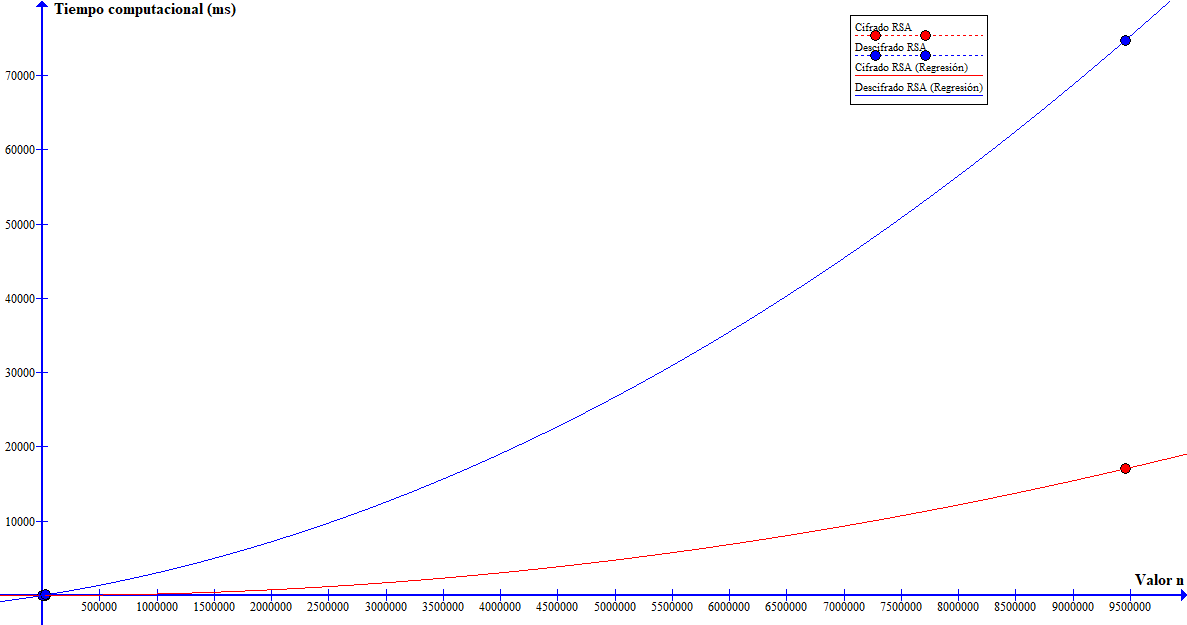

  Figura 1. Representación del tiempo computacional empleado por el algoritmo RSA, en función del valor $n$ del múdulo.

Conclusiones

- Se puede concluir que la búsqueda de algoritmos que sean eficientes y seguros es completamente necesario para el presente y aún más para el futuro: la virtualidad que ya está presente va a tener un gran aumento en los próximos años.
- Existen diferentes tipos de algoritmos que permiten tener seguridad informática para cualquier usuario; sin embargo, se tienen diferentes formas de hacerlo, y se descubre que el RSA es útil para cuando se desee codificar o descodificar un mensaje corto y no demasiado importante.
- A partir de la definición del algoritmo RSA, se tiene que es necesario tener números primos grandes para evitar problemas de seguridad dentro del algoritmo; sin embargo, entre más grandes sean, estos ocuparán más espacio y los cálculos llevarán más tiempo. Se concluye, por tanto, que la elección de los números $211$ y $131$ es adecuada para una implementación del algoritmo, pues no son lo suficientemente pequeños para resultar inseguros, ni lo suficientemente grandes para elevar el costo computacional.
- Se oberva que, en este caso particular, a la computadora le toma unas $263$ veces más tiempo descifrar un mensaje que cifrarlo. Lo anterior se puede atribuir a que $d$, el inverso multiplicativo que forma parte de la clave privada, es mucho mayor que $e$, el entero seleccionado para la clave pública.

Referencias

- [1] GONZALEZ SOLARTE, Nancy Adriana, et al. Casos de estudio de cibercrimen en Colombia. Recuperado de: https://repository.unad.edu.co/bitstream/handle/10596/36606/nagonzalezso.pdf?sequence=1&isAllowed=y

- [2] WIESMAIER, A. The State Of The Art In Algorithmic Encryption. 2006. Recuperado de: https://www.researchgate.net/publication/228981048_The_State_Of_The_Art_In_Algorithmic_Encryption

- [3] ALVARADO PRADO, Edisson Esteban, et al. ESTUDIO DE EFICIENCIA Y EFICACIA DE LOS ALGORITMOS CRIPTOGRÁFICOS RSA, AES, IDEA y RC4 EN LA SEGURIDAD INFORMÁTICA.Recuperado de: https://repository.unad.edu.co/bitstream/handle/10596/35362/eealvaradop.pdf?sequence=1&isAllowed=y

- [4] ABARCA PITA, José Florentino, et al. Fundamentos matemáticos del algoritmo RSA. 2018. Tesis de Maestría. Universidad Autónoma de Guerrero (México). Recuperado de: http://200.4.134.60/bitstream/handle/uagro/776/OK15158773_maestria.pdf?sequence=1&isAllowed=y

- [5] JONES, Gareth A.; JONES, Josephine M. Elementary number theory. Springer Science & Business Media, 2012. Recuperado de: https://link.springer.com/book/10.1007%2F978-1-4471-0613-5